# Random vs. Feedback Noise

Does the increasing FPR observed in experiments depend on the fact that we are using the model's predictions to perturb labels? What if we just randomly perturb labels during training according to a model's initial FPR? Would the same increase in FPR be observed?

In [13]:
import copy
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import importlib

import src.models.sklearn
import src.scripts.random_vs_feedback_noise
import src.utils.data
import src.utils.metrics
import src.utils.update
import src.utils.save

importlib.reload(src.models.sklearn)
importlib.reload(src.scripts.random_vs_feedback_noise)
importlib.reload(src.utils.data)
importlib.reload(src.utils.metrics)
importlib.reload(src.utils.update)
importlib.reload(src.utils.save)

from src.models.sklearn import lr
from src.scripts.random_vs_feedback_noise import train_update_loop, results_to_dataframe_boxplot, results_to_dataframe_scatterplot, boxplot, scatterplot
from src.utils.data import generate_gaussian_dataset
from src.utils.metrics import eval_model
from src.utils.update import update_model_feedback, update_model_noise
from src.utils.save import create_file_path, save_json, CONFIG_FILE

from dotenv import find_dotenv, load_dotenv
from settings import ROOT_DIR

%matplotlib inline

In [4]:
load_dotenv(find_dotenv(), override=True)
results_dir = os.environ.get("RANDOM_VS_FEEDBACK_RESULTS_DIR")
results_dir = os.path.join(ROOT_DIR, results_dir)

In [5]:
m0 = -1
m1 = 1

s0 = 1
s1 = 1

p0 = 0.5
p1 = 0.5

In [7]:
n_train = 1000
n_update = 10000
n_test = 50000

num_features = 2
num_updates = 100
seeds = 10
data_fn = generate_gaussian_dataset(m0, m1, s0, s1, p0, p1)
data_type = "gaussian"

In [8]:
initial_fprs, updated_fprs_noise, updated_fprs_feedback = train_update_loop(n_train, n_update, n_test, num_updates, num_features, data_fn, seeds)

In [9]:
config = {"n_train": n_train, "n_update": n_update, "n_test": n_test, "num_features": num_features, "num_updates": num_updates,
          "seeds": seeds, "m0": m0, "m1": m1, "s0": s0, "s1": s1, "p0": p0, "p1": p1, "data_type": data_type}

In [10]:
data_boxplot = results_to_dataframe_boxplot(initial_fprs, updated_fprs_noise, updated_fprs_feedback)

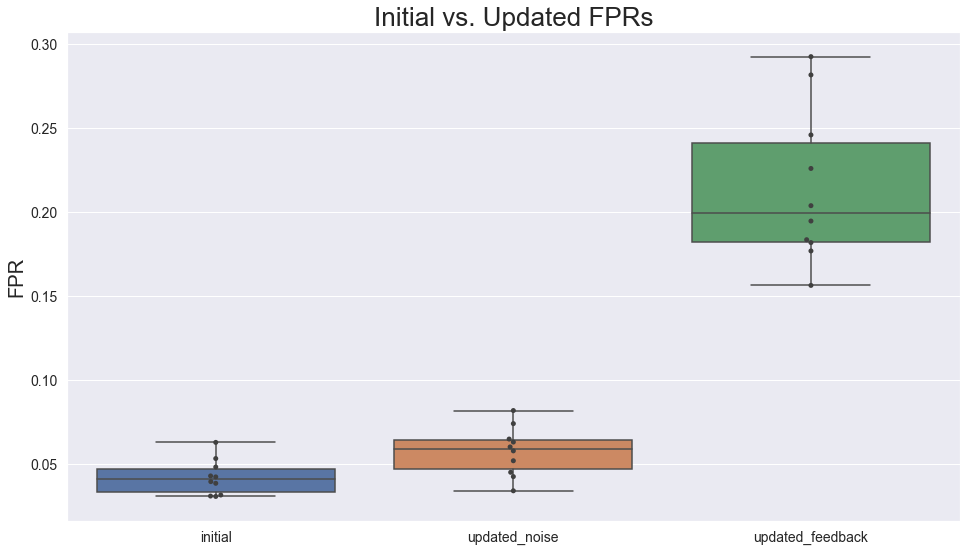

In [14]:
plot_name = "fpr_boxplot_noise_vs_feedback_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
boxplot(data_boxplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)

In [15]:
data_scatterplot = results_to_dataframe_scatterplot(initial_fprs, updated_fprs_noise, updated_fprs_feedback)

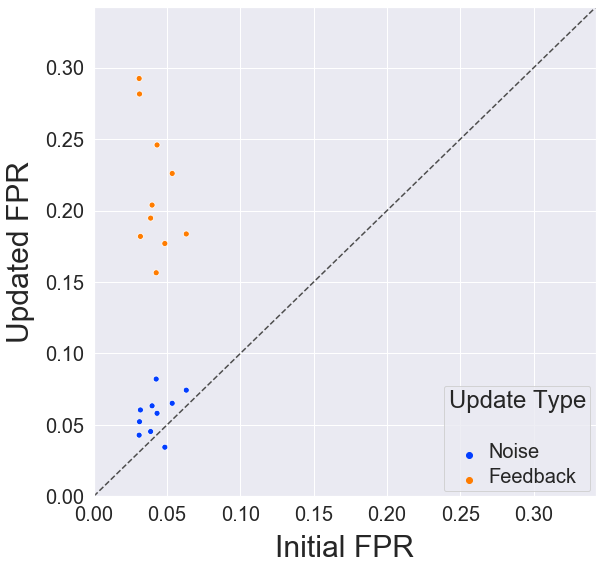

In [17]:
plot_name = "fpr_scatterplot_noise_vs_feedback_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
scatterplot(data_scatterplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)